In [0]:
%pip install geopy matplotlib basemap basemap-data-hires pandas

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
import pandas as pd 
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap 

def plot_city_number(cities): 
    # Initialize Nominatim API 
    geolocator = Nominatim(user_agent="databricks_coffee_viewer") 

    # Create a map 
    fig, ax = plt.subplots() 
    map = Basemap(projection='cyl', resolution = 'i', llcrnrlon=12.49, llcrnrlat=48.72, urcrnrlon=27.68, urcrnrlat=56.87) 
    map.shadedrelief()
    map.drawcoastlines() 
    map.drawcountries() 
    map.drawmapboundary() 

    # Plot the number at the city's location 
    for city, number in cities:
        # Get location for the city 
        location = geolocator.geocode(city) 
        latitude = location.latitude 
        longitude = location.longitude 

        x, y = map(longitude, latitude) 
        plt.text(x, y, str(f"{city}: {number}"), fontsize=8, ha='left', va='bottom', color='k') 

    plt.show() 

In [0]:
%sql

SELECT name, city, COUNT(*) AS coffess FROM coffees GROUP BY name, city ORDER BY 3 DESC;

name,city,coffess
Andrzej,Kalisz,70
Wojciech,Szczecin,64
Katarzyna,Płock,42
Mariusz,Kielce,36
Krzysztof,Płock,31
Jan,Lublin,30
Magda,Kraków,26
Joanna,Lublin,25
Dominika,Świebodzin,16
Anna,Grudziądz,16


In [0]:
%sql

SELECT * from coffees limit 5;

name,date,coffee_type,mug_size,city
Magda,2023-11-12,capuccino,M,Kraków
Magda,2023-11-11,capuccino,M,Kraków
Magda,2023-11-12,capuccino,M,Kraków
Magda,2023-11-03,capuccino,M,Kraków
Magda,2023-11-13,capuccino,M,Kraków


In [0]:
%sql

SELECT coffee_type, COUNT(*) AS coffess FROM coffees GROUP BY coffee_type ORDER BY 2 DESC;

coffee_type,coffess
americano,117
latte,83
espresso,75
decaf,65
capuccino,35
lungo,32


In [0]:
%sql

SELECT mug_size, COUNT(*) AS coffess FROM coffees GROUP BY mug_size ORDER BY 2 DESC;

mug_size,coffess
L,265
S,75
M,67


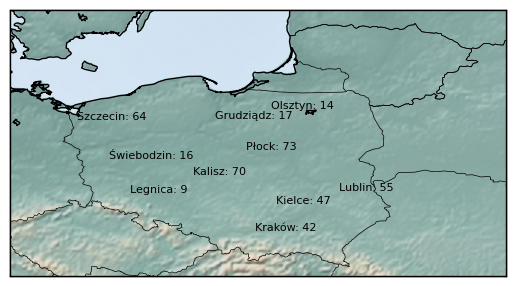

In [0]:
plot_city_number([(r.city, r.coffees) for r in spark.sql("SELECT city, COUNT(*) AS coffees FROM coffees GROUP BY city").collect()])